In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/netflix.csv')

In [3]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


<AxesSubplot:>

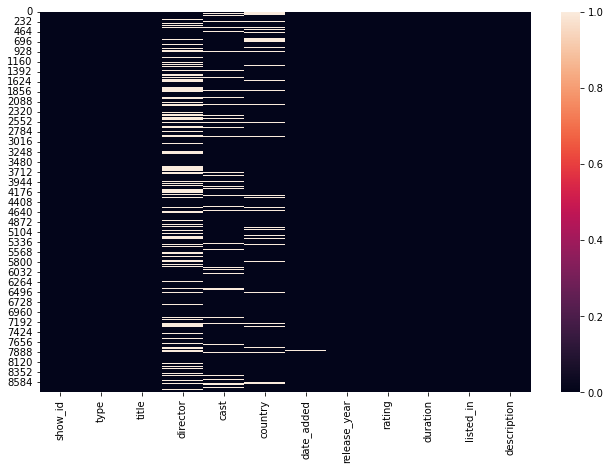

In [4]:
plt.figure(figsize=(11,7))
sns.heatmap(df.isna())

<AxesSubplot:xlabel='type', ylabel='count'>

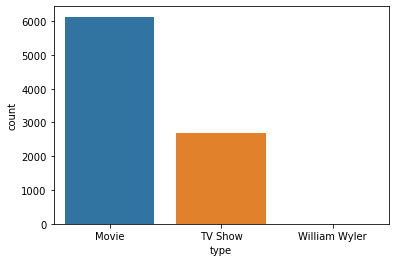

In [5]:
sns.countplot(x='type', data=df)

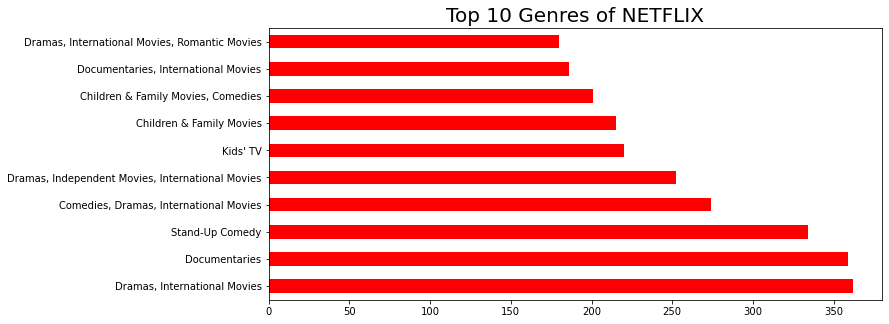

In [6]:
plt.figure(figsize=(11,5))
df['listed_in'].value_counts()[:10].plot(kind='barh', color='r')
plt.title('Top 10 Genres of NETFLIX', size=20);

In [7]:
df_cp = df.copy()
df_cp = df_cp.loc[df_cp['type']=='Movie']
df_cp.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [8]:
df_cp.drop(['director', 'cast'], axis=1, inplace=True)
df_cp.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,NaN,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [9]:
df_cp['country'] = df_cp['country'].ffill(axis=0)
df_cp.loc[df_cp['country'].isnull()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description


In [10]:
ratings = ['TV-PG', 'TV-MA']

for id, rating in zip(df_cp.loc[df_cp['rating'].isnull()].index, ratings):
    df_cp['rating'].loc[id] = rating

In [11]:
df_cp = df_cp.loc[df_cp['date_added'].notna()]
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6130 entries, 0 to 8808
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6130 non-null   object
 1   type          6130 non-null   object
 2   title         6130 non-null   object
 3   country       6130 non-null   object
 4   date_added    6130 non-null   object
 5   release_year  6130 non-null   object
 6   rating        6130 non-null   object
 7   duration      6127 non-null   object
 8   listed_in     6130 non-null   object
 9   description   6130 non-null   object
dtypes: object(10)
memory usage: 526.8+ KB


In [12]:
df_cp.insert(4,'main_country', df_cp['country'].apply(lambda x: x.split(',')[0]))
df_cp.head(3)

,show_id,type,title,country,main_country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,United States,United States,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",United States,24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [13]:
top_countries = df_cp.groupby('main_country').count().sort_values('type', ascending=False)[:10]
top_countries

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
main_country,,,,,,,,,,
United States,2540,2540,2540,2540,2540,2540,2540,2537,2540,2540
India,998,998,998,998,998,998,998,998,998,998
United Kingdom,410,410,410,410,410,410,410,410,410,410
Canada,196,196,196,196,196,196,196,196,196,196
France,159,159,159,159,159,159,159,159,159,159
Spain,133,133,133,133,133,133,133,133,133,133
Nigeria,111,111,111,111,111,111,111,111,111,111
Egypt,106,106,106,106,106,106,106,106,106,106
Mexico,95,95,95,95,95,95,95,95,95,95


In [14]:
top_genres = df_cp.groupby('listed_in').count().sort_values('type', ascending=False)[:10]
top_genres

,show_id,type,title,country,main_country,date_added,release_year,rating,duration,description
listed_in,,,,,,,,,,
"Dramas, International Movies",362,362,362,362,362,362,362,362,362,362
Documentaries,359,359,359,359,359,359,359,359,359,359
Stand-Up Comedy,334,334,334,334,334,334,334,334,334,334
"Comedies, Dramas, International Movies",274,274,274,274,274,274,274,274,274,274
"Dramas, Independent Movies, International Movies",252,252,252,252,252,252,252,252,252,252
Children & Family Movies,215,215,215,215,215,215,215,215,215,215
"Children & Family Movies, Comedies",201,201,201,201,201,201,201,201,201,201
"Documentaries, International Movies",186,186,186,186,186,186,186,186,186,186
"Dramas, International Movies, Romantic Movies",180,180,180,180,180,180,180,180,180,180


In [15]:
df_cp = df_cp[df_cp['listed_in'].isin(list(top_genres.index))]
df_cp = df_cp[df_cp['main_country'].isin(list(top_countries.index))]

In [16]:
ratings=[]
for rate in df['rating'].unique():
    ratings.append(rate)

countries = df_cp['main_country'].unique().tolist()

listing = df_cp['listed_in'].unique().tolist()

ratings, countries, listing

(['PG-13',
  'TV-MA',
  'PG',
  'TV-14',
  'TV-PG',
  'TV-Y',
  'TV-Y7',
  'R',
  'TV-G',
  'G',
  'NC-17',
  '74 min',
  '84 min',
  '66 min',
  'NR',
  nan,
  'TV-Y7-FV',
  'UR',
  'Classic Movies, Documentaries'],
 ['United States',
  'Japan',
  'Nigeria',
  'France',
  'United Kingdom',
  'India',
  'Mexico',
  'Egypt',
  'Canada',
  'Spain'],
 ['Documentaries',
  'Children & Family Movies',
  'Dramas, Independent Movies, International Movies',
  'Dramas, International Movies',
  'Children & Family Movies, Comedies',
  'Comedies, Dramas, International Movies',
  'Documentaries, International Movies',
  'Dramas, International Movies, Romantic Movies',
  'Comedies, International Movies',
  'Stand-Up Comedy'])

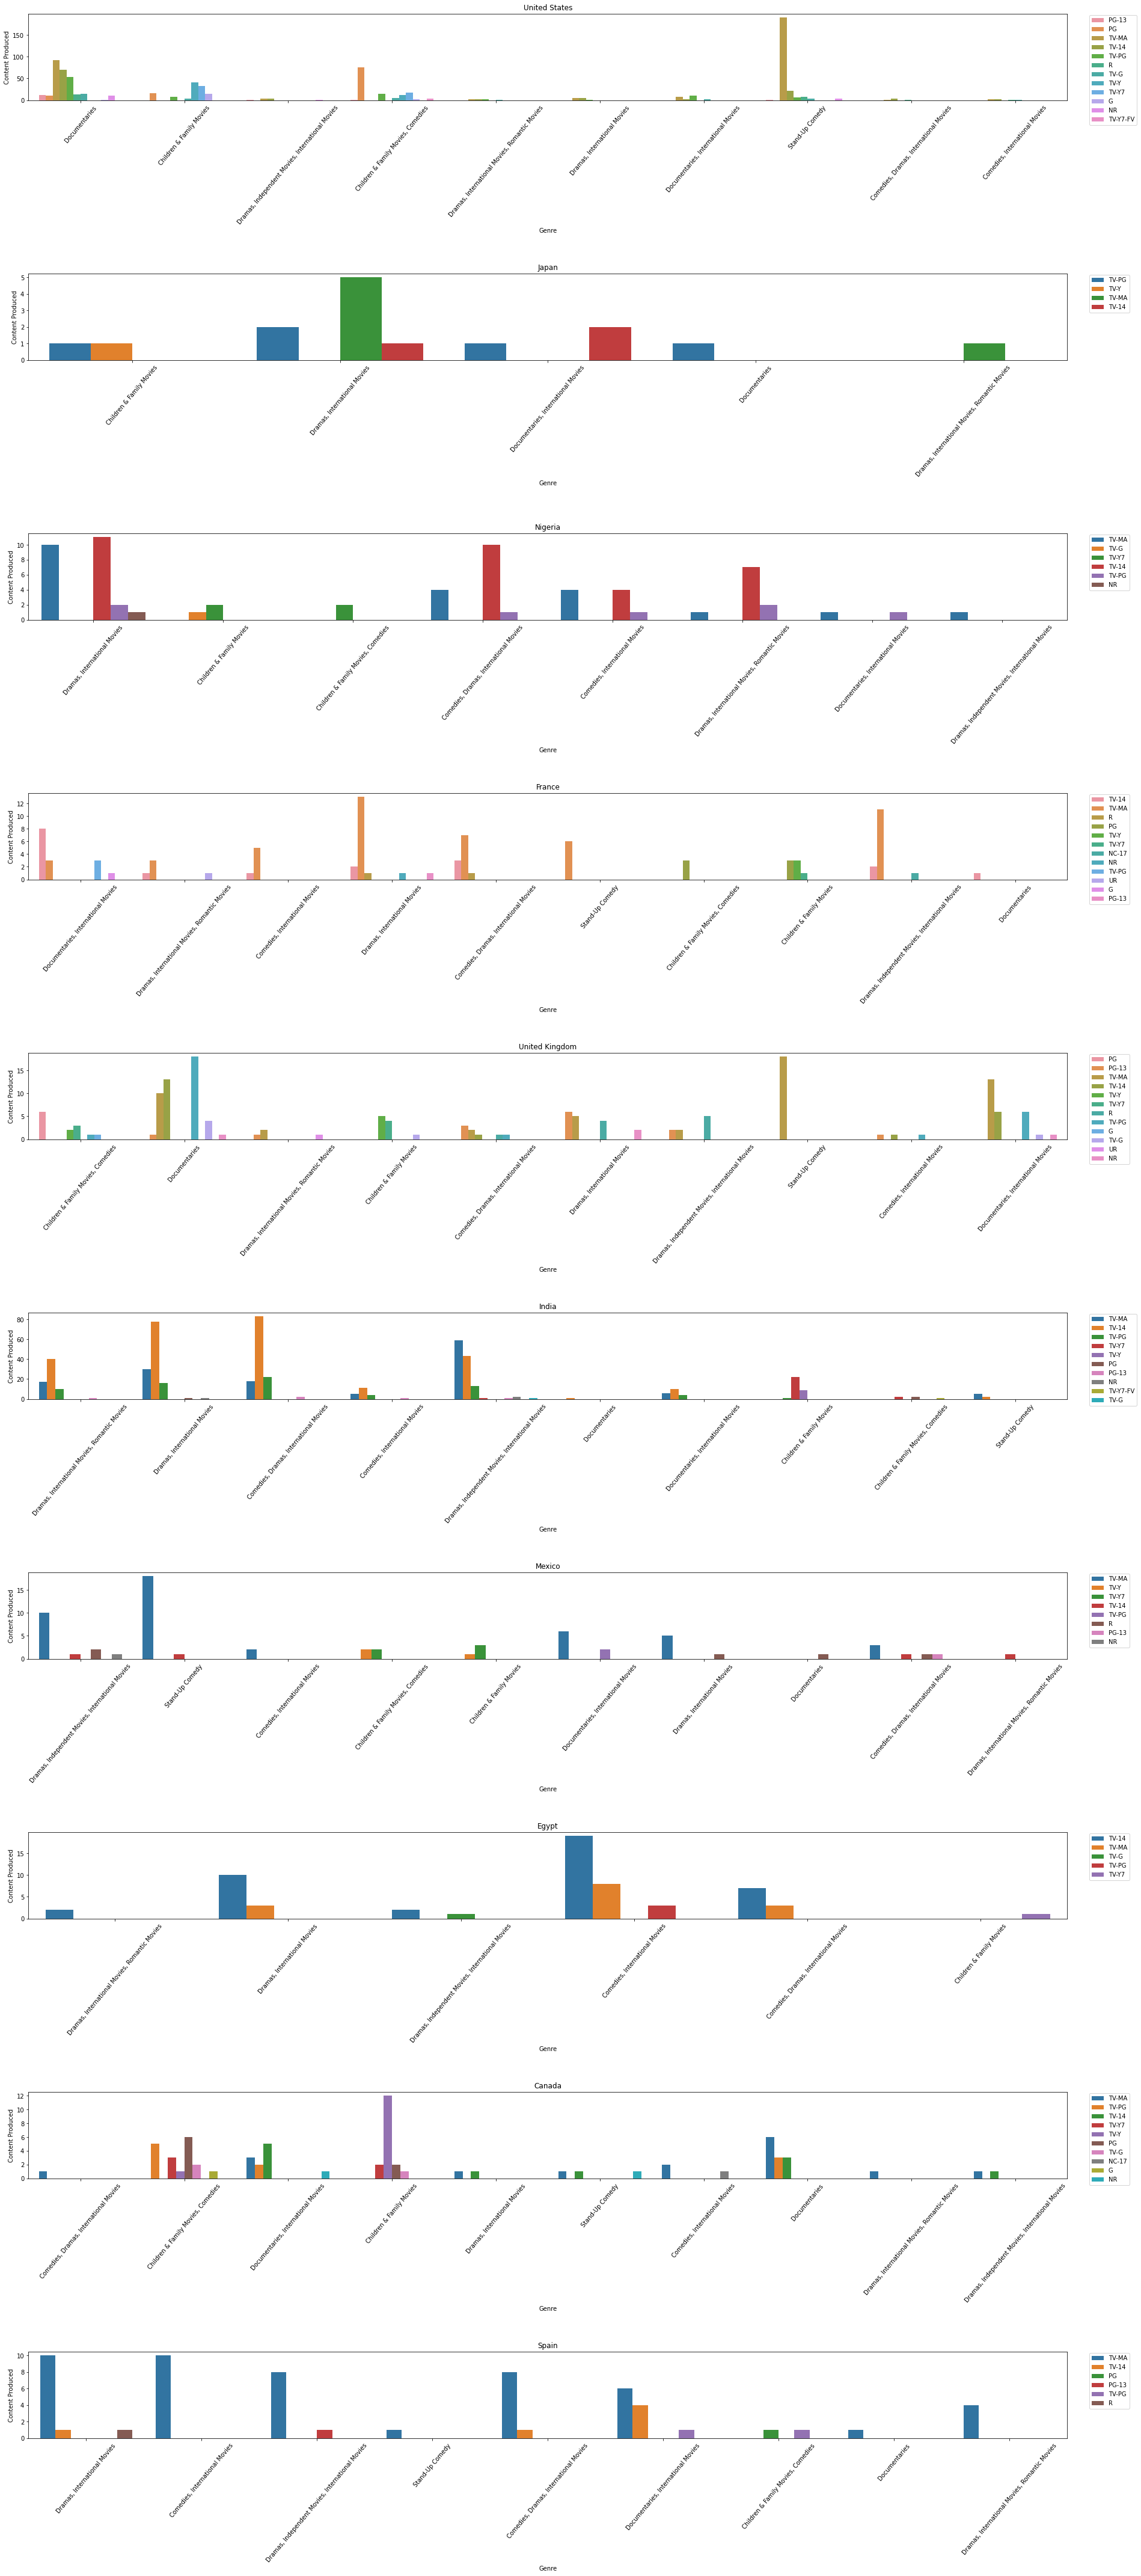

In [17]:
fig = plt.figure(
    figsize=(30,40)
    )

for i, name in enumerate(countries):
    frame = df_cp.loc[df_cp['main_country'] == str(name)]
    ax = fig.add_subplot(len(countries),1,i+1)
    topic = name
    sns.countplot(x='listed_in', data= frame.loc[frame['listed_in'].isin(listing)], hue='rating')
    ax.set_title(topic)
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.2)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.5, 
                    hspace=2.0)
    plt.xlabel('Genre')
    plt.xticks(rotation = 50)
    ax.set(ylabel='Content Produced')

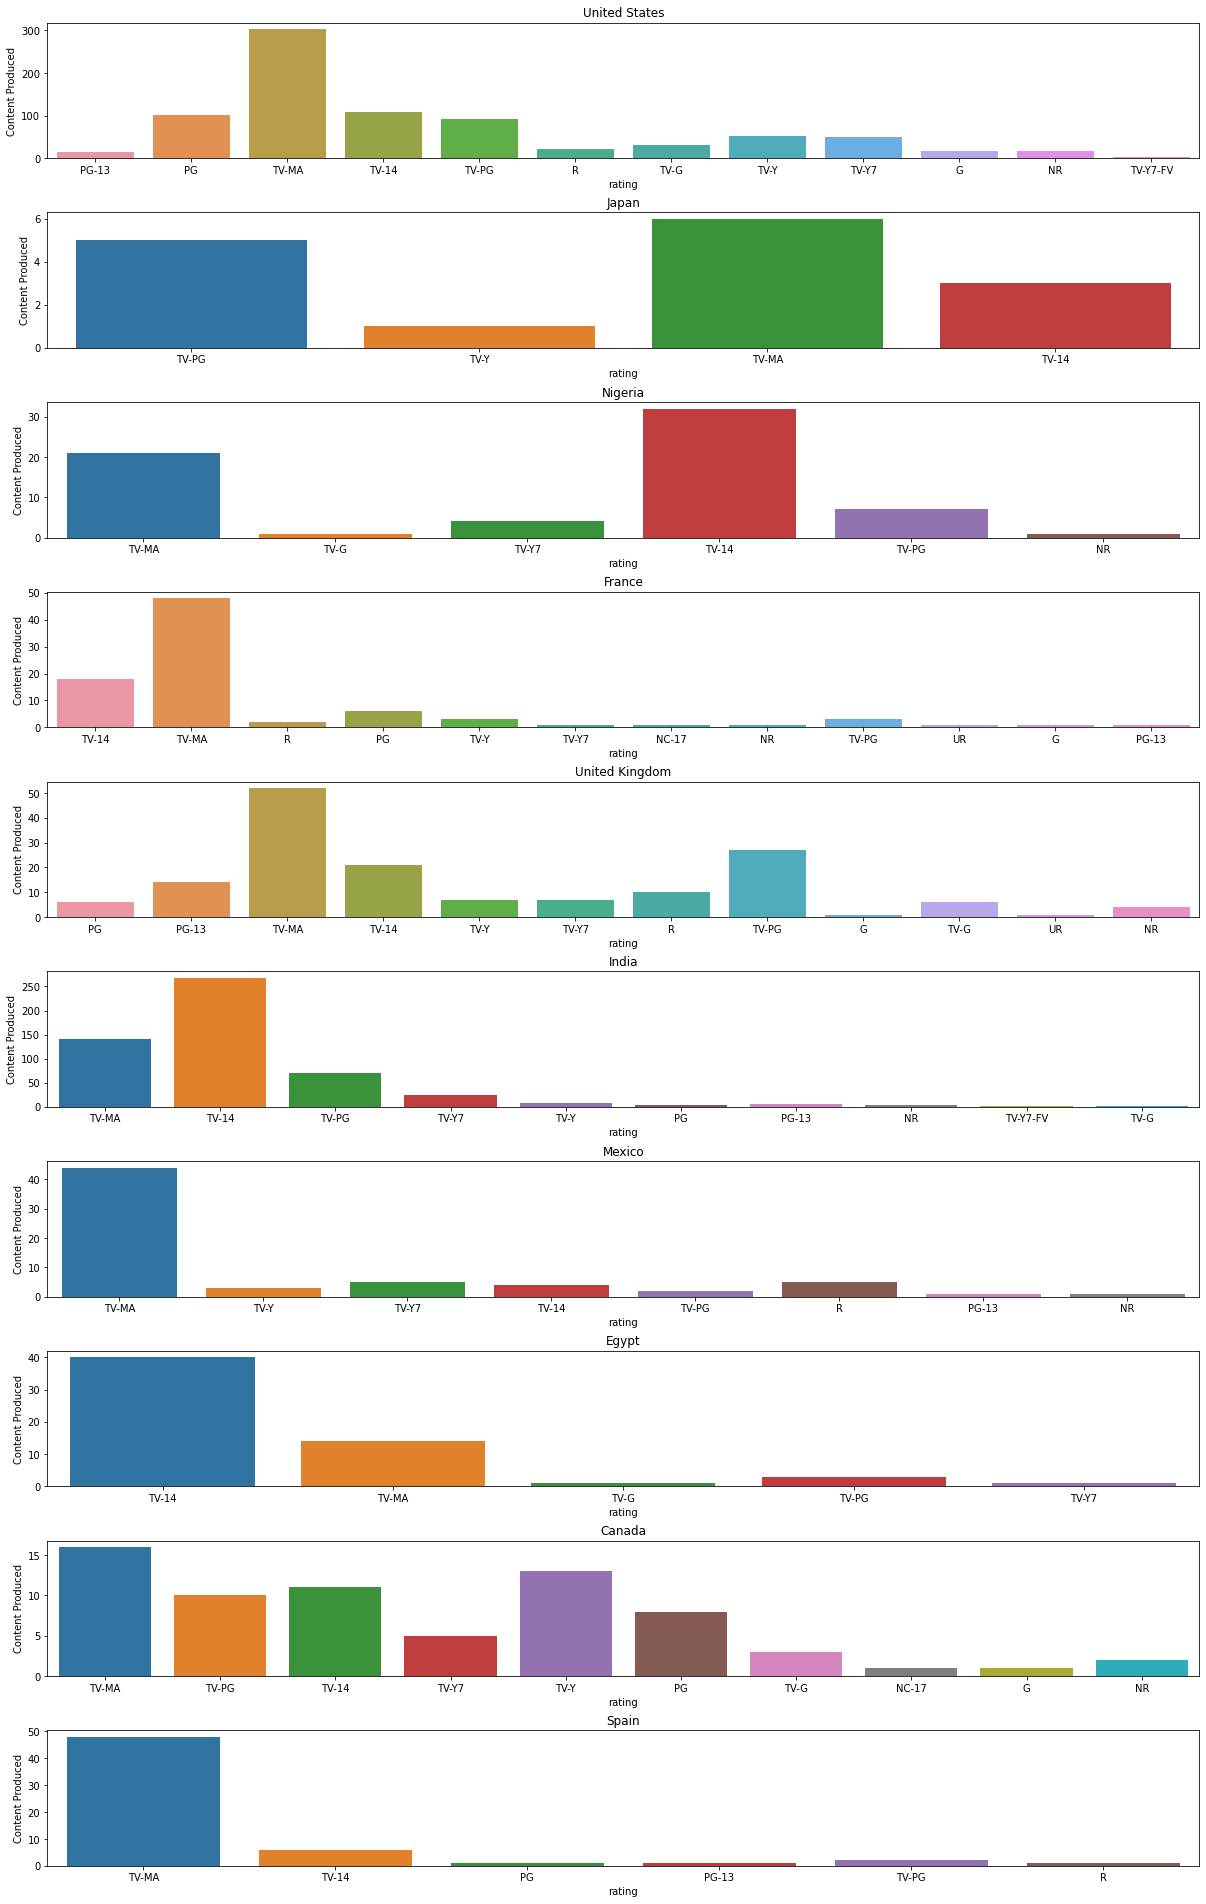

In [18]:
fig = plt.figure(
    figsize=(20,32)
    )

for i, name in enumerate(countries):
    frame = df_cp.loc[df_cp['main_country'] == str(name)]
    ax = fig.add_subplot(len(countries),1,i+1)
    topic = name
    sns.countplot(x='rating', data= frame.loc[frame['rating'].isin(ratings)])
    ax.set_title(topic)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    ax.set(ylabel='Content Produced')